<a href="https://colab.research.google.com/github/kalinharikumar/Industrial-Copper-Modeling/blob/main/copper_pp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Industrial Copper Modeling**

## Python scripting, Data Preprocessing,
## EDA, Streamlit

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
import sklearn

In [ ]:
data=pd.read_excel('/content/drive/MyDrive/daily_offers.xlsx')

In [ ]:
data

,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,20210401.0,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,DEQ1 S460MC,1670798778,20210701.0,854.00
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,20210401.0,768.024839,30202938.0,25.0,Won,W,41.0,0.80,1210.0,0000000000000000000000000000000000104991,1668701718,20210401.0,1047.00
2,E140FF1B-2407-4C02-A0DD-780A093B1158,20210401.0,386.127949,30153963.0,30.0,Won,WI,28.0,0.38,952.0,S0380700,628377,20210101.0,644.33
3,F8D507A0-9C62-4EFE-831E-33E1DA53BB50,20210401.0,202.411065,30349574.0,32.0,Won,S,59.0,2.30,1317.0,DX51D+ZM310MAO 2.3X1317,1668701718,20210101.0,768.00
4,4E1C4E78-152B-430A-8094-ADD889C9D0AD,20210401.0,785.526262,30211560.0,28.0,Won,W,10.0,4.00,2000.0,2_S275JR+AR-CL1,640665,20210301.0,577.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181668,DE633116-D1DF-4846-982E-55EFC3658A76,20200702.0,102.482422,30200854.0,25.0,Won,W,41.0,0.96,1220.0,0000000000000000000000000000000001000777,164141591,20200701.0,591.00
181669,A48374B1-E6DB-45F2-889A-1F9C27C099EB,20200702.0,208.086469,30200854.0,25.0,Won,W,41.0,0.95,1500.0,0000000000000000000000000000000001000227,164141591,20200701.0,589.00
181670,91643238-5C7B-4237-9A5F-63AE3D35F320,20200702.0,4.235594,30200854.0,25.0,Won,W,41.0,0.71,1250.0,0000000000000000000000000000000001004216,164141591,20200701.0,619.00
181671,7AFFD323-01D9-4E15-B80D-7D1B03498FC8,20200702.0,-2000,30200854.0,25.0,Won,W,41.0,0.85,1250.0,0000000000000000000000000000000001001149,164141591,20200701.0,601.00


In [ ]:
df=data.copy()
df.dtypes

id                object
item_date        float64
quantity tons     object
customer         float64
country          float64
status            object
item type         object
application      float64
thickness        float64
width            float64
material_ref      object
product_ref        int64
delivery date    float64
selling_price    float64
dtype: object

In [ ]:
df.describe()

,item_date,customer,country,application,thickness,width,product_ref,delivery date,selling_price
count,1.816720e+05,1.816720e+05,181645.000000,181649.000000,181672.000000,181673.000000,1.816730e+05,1.816720e+05,1.816720e+05
mean,2.020459e+07,3.051221e+07,44.893022,25.615809,2.564827,1295.286724,4.739679e+08,2.020738e+07,1.918036e+03
std,4.551119e+03,2.433382e+07,24.404214,17.754175,6.572321,261.631754,7.175101e+08,2.411059e+04,3.317956e+05
min,1.995000e+07,1.245800e+04,25.000000,2.000000,0.180000,1.000000,6.117280e+05,2.019040e+07,-1.160000e+03
25%,2.020093e+07,3.019688e+07,26.000000,10.000000,0.700000,1180.000000,6.119930e+05,2.020110e+07,6.690000e+02
50%,2.020113e+07,3.020524e+07,30.000000,15.000000,1.500000,1250.000000,6.406650e+05,2.021010e+07,8.120000e+02
75%,2.021020e+07,3.028042e+07,78.000000,41.000000,3.000000,1500.000000,1.332077e+09,2.021040e+07,9.530000e+02
max,2.021040e+07,2.147484e+09,113.000000,99.000000,2500.000000,2990.000000,1.722208e+09,3.031010e+07,1.000010e+08


# ***Preprocessing***(4c's of data cleaning: correcting, completing, creating & converting)

Some rubbish values are present in ‘Material_Ref’ which starts with ‘00000’ value which are converted into NaN.

In [ ]:
a=df['material_ref'].str.startswith('00000')
b=(a==True)
df['material_ref'][b]=np.NaN
df

<ipython-input-51-e1ea41c9040a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['material_ref'][b]=np.NaN


,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,20210401.0,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,DEQ1 S460MC,1670798778,20210701.0,854.00
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,20210401.0,768.024839,30202938.0,25.0,Won,W,41.0,0.80,1210.0,NaN,1668701718,20210401.0,1047.00
2,E140FF1B-2407-4C02-A0DD-780A093B1158,20210401.0,386.127949,30153963.0,30.0,Won,WI,28.0,0.38,952.0,S0380700,628377,20210101.0,644.33
3,F8D507A0-9C62-4EFE-831E-33E1DA53BB50,20210401.0,202.411065,30349574.0,32.0,Won,S,59.0,2.30,1317.0,DX51D+ZM310MAO 2.3X1317,1668701718,20210101.0,768.00
4,4E1C4E78-152B-430A-8094-ADD889C9D0AD,20210401.0,785.526262,30211560.0,28.0,Won,W,10.0,4.00,2000.0,2_S275JR+AR-CL1,640665,20210301.0,577.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181668,DE633116-D1DF-4846-982E-55EFC3658A76,20200702.0,102.482422,30200854.0,25.0,Won,W,41.0,0.96,1220.0,NaN,164141591,20200701.0,591.00
181669,A48374B1-E6DB-45F2-889A-1F9C27C099EB,20200702.0,208.086469,30200854.0,25.0,Won,W,41.0,0.95,1500.0,NaN,164141591,20200701.0,589.00
181670,91643238-5C7B-4237-9A5F-63AE3D35F320,20200702.0,4.235594,30200854.0,25.0,Won,W,41.0,0.71,1250.0,NaN,164141591,20200701.0,619.00
181671,7AFFD323-01D9-4E15-B80D-7D1B03498FC8,20200702.0,-2000,30200854.0,25.0,Won,W,41.0,0.85,1250.0,NaN,164141591,20200701.0,601.00


## filling NaN values using fillna

In [ ]:
df.nunique()

In [ ]:
#divinding catogorigal and continuous valued columns
median=[]
mode=['item_date','customer','status','item type','application','material_ref','country','delivery date','product_ref']
mean=['quantity tons','thickness','width','selling_price']
columns=list(df.columns) 
columns.remove('id')

In [ ]:
#found 'e' in quality tons so replacing it with NaN
df['quantity tons']=df['quantity tons'].replace('e',np.NaN).astype('float64').abs()
#while changing to date format makes a error
df['item_date']=df['item_date'].replace(19950000,np.NaN)
df['item_date']=df['item_date'].replace(20191919,np.NaN)
df['delivery date']=df['delivery date'].replace(30310101,np.NaN)
df['delivery date']=df['delivery date'].replace(20212222,np.NaN)


In [ ]:
df.isnull().sum()

id               2
item_date        1
quantity tons    0
customer         0
country          0
status           0
item type        0
application      0
thickness        0
width            0
material_ref     0
product_ref      0
delivery date    1
selling_price    0
dtype: int64

In [ ]:
for i in columns:
  if i in median:
    df[i].fillna(df[i].median(),inplace=True)
  elif i in mode:
    df[i].fillna(df[i].mode()[0],inplace=True)
  elif i in mean:
    df[i].fillna(df[i].mean(),inplace=True)
df.isnull().sum()

id               2
item_date        0
quantity tons    0
customer         0
country          0
status           0
item type        0
application      0
thickness        0
width            0
material_ref     0
product_ref      0
delivery date    0
selling_price    0
dtype: int64

Changing dtypes in df(if any found)

finding outliers and skewness

<function matplotlib.pyplot.show(close=None, block=None)>

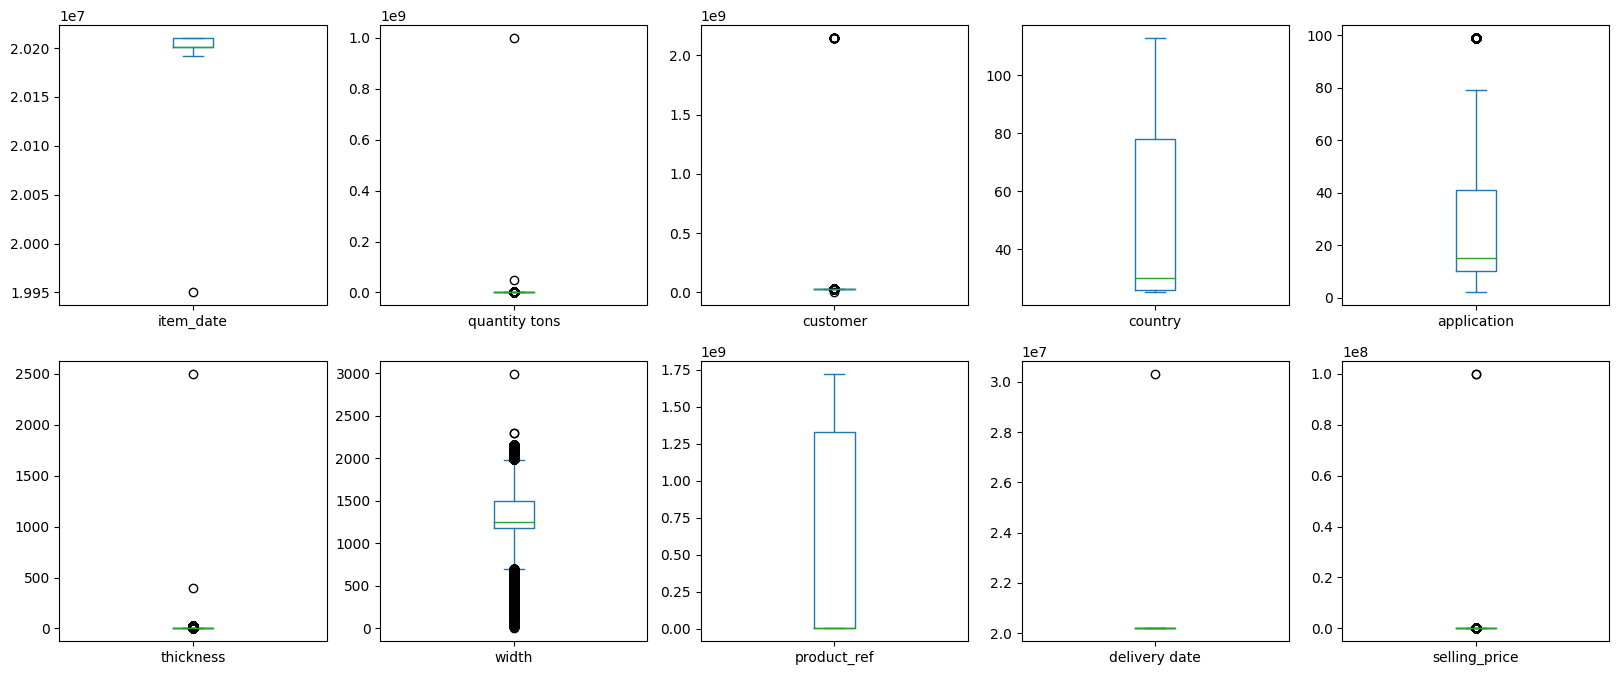

In [ ]:
df.plot(kind='box',subplots=True,layout=(2,5),figsize=(20,8))
plt.show

In [ ]:
df.skew()

<ipython-input-73-9e0b1e29546f>:1: FutureWarning: The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.skew()


item_date         -0.526424
quantity tons    424.690816
customer          86.985308
country            0.753090
application        0.724555
thickness        303.447634
width              0.374597
product_ref        1.015216
delivery date    404.953746
selling_price    301.388088
dtype: float64

To find the lower and upper limit with IQR
calculating the Interquartile Range of the data (IQR = Q3 — Q1). Later, will be determine the outlier boundaries with IQR.where Q='table col'.quantile('0.25 and 0.75')
And getting the lower boundary with Q1–1.5 * IQR and getting upper boundary with Q3 + 1.5 * IQR.

In [ ]:
correction_columns=['quantity tons','thickness','width','selling_price']
for i in correction_columns:
  Q1=df[i].quantile(0.25)
  Q3=df[i].quantile(0.75)
  IQR=Q3-Q1
  print('\n',i,' lower limit=',Q1-1.5 * IQR,' upper limit=',Q3+1.5 * IQR)


 quantity tons  lower limit= -73.31540512358451  upper limit= 151.44757009725032

 thickness  lower limit= -2.75  upper limit= 6.449999999999999

 width  lower limit= 700.0  upper limit= 1980.0

 selling_price  lower limit= 243.0  upper limit= 1379.0


In [ ]:
correction_columns=['quantity tons','thickness','width','selling_price']
for i in correction_columns:
  Q1=df[i].quantile(0.01)
  Q3=df[i].quantile(0.98)
  print('\n',i,' lower limit=',Q1,' upper limit=',Q3)


 quantity tons  lower limit= 0.7752243002967336  upper limit= 702.789880521828

 thickness  lower limit= 0.36  upper limit= 12.0

 width  lower limit= 678.0  upper limit= 2000.0

 selling_price  lower limit= 18.0  upper limit= 1295.0


In [ ]:
from scipy.stats.mstats import winsorize

<function matplotlib.pyplot.show(close=None, block=None)>

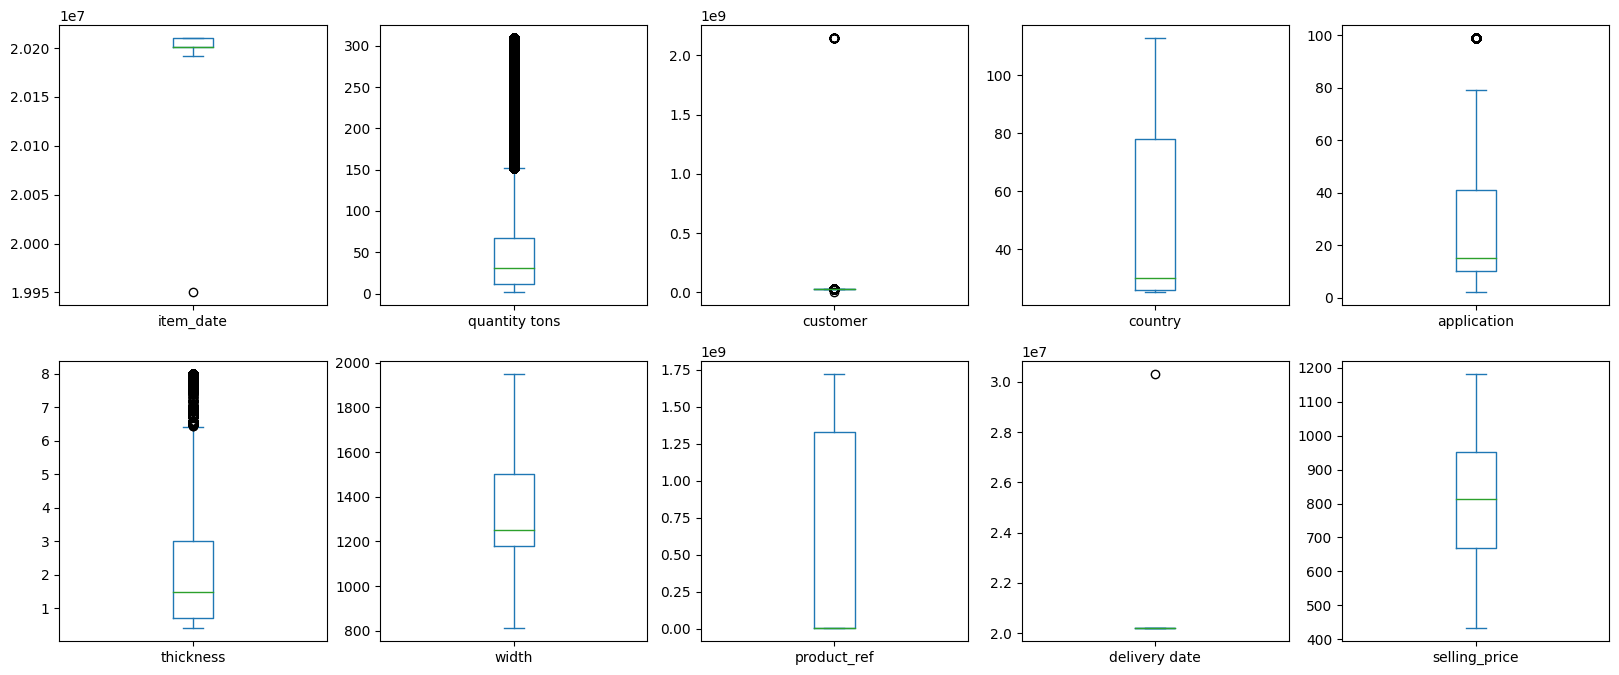

In [ ]:
correction_columns=['quantity tons','thickness','width','selling_price']
for i in correction_columns:
  df[i]=winsorize(df[i],(0.02,0.05))
df.plot(kind='box',subplots=True,layout=(2,5),figsize=(20,8))
plt.show

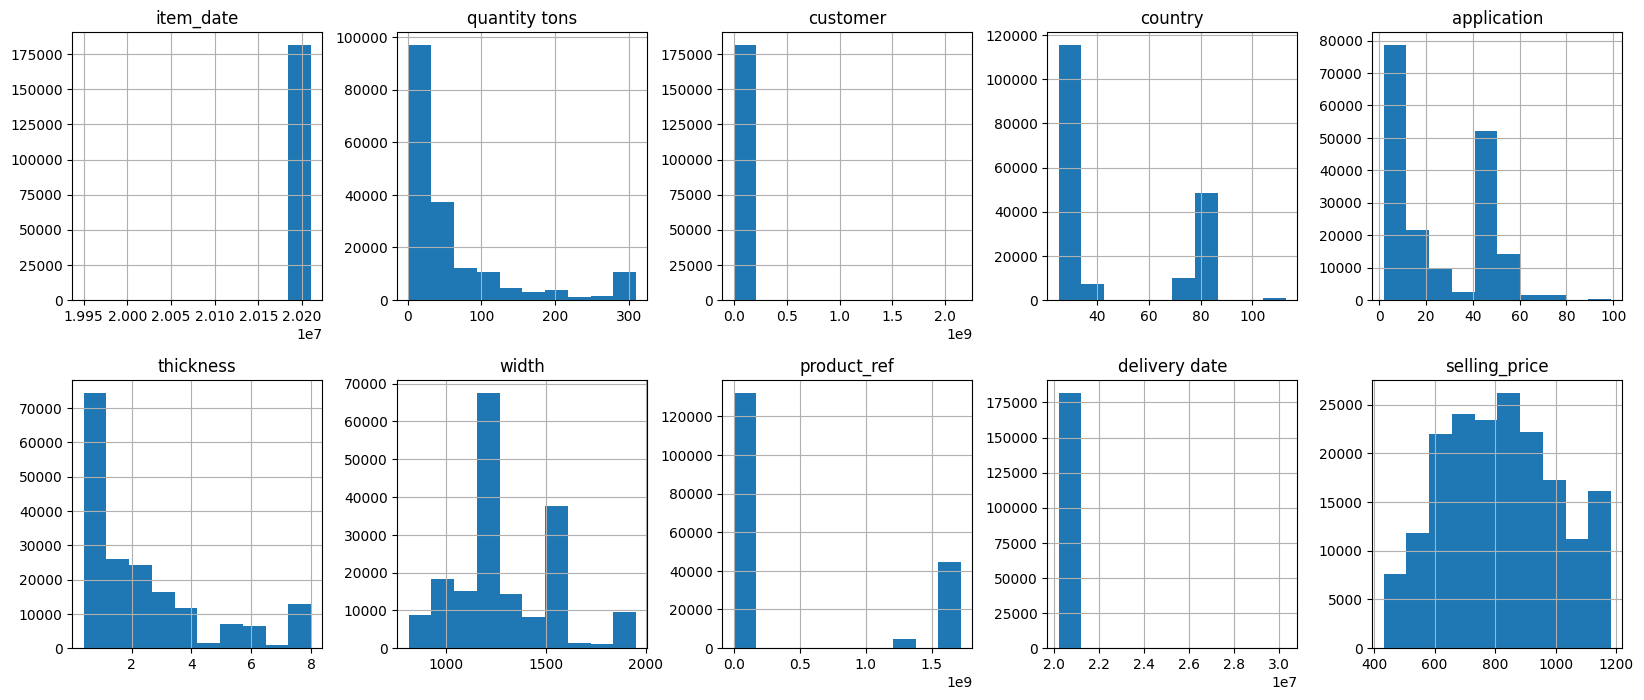

In [ ]:
df.hist(layout=(2,5),figsize=(20,8))
plt.show()

In [ ]:
 df.describe()

/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:4650: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:4650: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:4650: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:4650: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:4650: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:4650: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition

,item_date,quantity tons,customer,country,application,thickness,width,product_ref,delivery date,selling_price
count,1.816720e+05,181673.000000,1.816730e+05,181673.000000,181673.000000,181673.000000,181673.000000,1.816730e+05,1.816720e+05,181673.000000
mean,2.020459e+07,61.123098,3.051221e+07,44.898125,25.613746,2.358257,1297.134418,4.739679e+08,2.020738e+07,817.424946
std,4.551119e+03,79.013303,2.433375e+07,24.405794,17.753909,2.160593,241.424870,7.175101e+08,2.411059e+04,190.385918
min,1.995000e+07,1.368630,1.245800e+04,25.000000,2.000000,0.400000,811.000000,6.117280e+05,2.019040e+07,432.000000
25%,2.020093e+07,10.970711,3.019688e+07,26.000000,10.000000,0.700000,1180.000000,6.119930e+05,2.020110e+07,669.000000
50%,2.020113e+07,30.365004,3.020524e+07,30.000000,15.000000,1.500000,1250.000000,6.406650e+05,2.021010e+07,812.000000
75%,2.021020e+07,67.161454,3.028042e+07,78.000000,41.000000,3.000000,1500.000000,1.332077e+09,2.021040e+07,953.000000
max,2.021040e+07,309.515367,2.147484e+09,113.000000,99.000000,8.000000,1950.000000,1.722208e+09,3.031010e+07,1182.000000


In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
cat_col=['country','status','item type','application','material_ref','product_ref']
le = LabelEncoder()
for i in cat_col:
  print(i)
  print(df[i].unique())
  df[i] = le.fit_transform(df[i])
  print(df[i].unique())

country
[ 28.  25.  30.  32.  38.  78.  27.  77. 113.  79.  26.  39.  40.  84.
  80. 107.  89.]
[ 3  0  4  5  6 10  2  9 16 11  1  7  8 13 12 15 14]
status
['Won' 'Draft' 'To be approved' 'Lost' 'Not lost for AM' 'Wonderful'
 'Revised' 'Offered' 'Offerable']
[7 0 6 1 2 8 5 4 3]
item type
['W' 'WI' 'S' 'Others' 'PL' 'IPL' 'SLAWR']
[5 6 3 1 2 0 4]
application
[10. 41. 28. 59. 15.  4. 38. 56. 42. 26. 27. 19. 20. 66. 29. 22. 40. 25.
 67. 79.  3. 99.  2.  5. 39. 69. 70. 65. 58. 68.]
[ 4 17 12 21  5  2 14 19 18 10 11  6  7 23 13  8 16  9 24 28  1 29  0  3
 15 26 27 22 20 25]
material_ref
['DEQ1 S460MC' 'DX51D+Z' 'S0380700' ... 'MAS65550' '4.11043_1060X5_BRE'
 '202006170005.IO.1.1']
[5377 5484 9681 ... 8061 2179 1589]
product_ref
[1670798778 1668701718     628377     640665     611993 1668701376
  164141591 1671863738 1332077137     640405 1693867550 1665572374
 1282007633 1668701698     628117 1690738206     628112     640400
 1671876026  164336407  164337175 1668701725 1665572032     611728

In [ ]:
a=df['item_date'].astype(int).unique()
a.sort()
a

In [ ]:
a=df['delivery date'].astype(int).unique()
a.sort()
a

array([20190401, 20190701, 20191001, 20200101, 20200401, 20200501,
       20200601, 20200701, 20200801, 20200901, 20201001, 20201101,
       20201201, 20210101, 20210201, 20210301, 20210401, 20210501,
       20210601, 20210701, 20210801, 20210901, 20211001, 20211101,
       20211201, 20212222, 20220101])

In [ ]:
df['item_date'] = pd.to_datetime(df['item_date'].astype('int64'),format='%Y%m%d')

In [ ]:
df['delivery date'] = pd.to_datetime(df['delivery date'].astype('int64'),format='%Y%m%d')

In [ ]:
df

,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price,delivery_period
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,2021-04-01,54.151139,30156308.0,3,7,5,4,2.00,1500.0,5377,24,2021-07-01,854.00,91
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,2021-04-01,309.515367,30202938.0,0,7,5,17,0.80,1210.0,5484,22,2021-04-01,1047.00,0
2,E140FF1B-2407-4C02-A0DD-780A093B1158,2021-04-01,309.515367,30153963.0,4,7,6,12,0.40,952.0,9681,5,2021-01-01,644.33,90
3,F8D507A0-9C62-4EFE-831E-33E1DA53BB50,2021-04-01,202.411065,30349574.0,5,7,3,21,2.30,1317.0,5651,22,2021-01-01,768.00,90
4,4E1C4E78-152B-430A-8094-ADD889C9D0AD,2021-04-01,309.515367,30211560.0,3,7,5,4,4.00,1950.0,1908,8,2021-03-01,577.00,31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181668,DE633116-D1DF-4846-982E-55EFC3658A76,2020-07-02,102.482422,30200854.0,0,7,5,17,0.96,1220.0,5484,9,2020-07-01,591.00,1
181669,A48374B1-E6DB-45F2-889A-1F9C27C099EB,2020-07-02,208.086469,30200854.0,0,7,5,17,0.95,1500.0,5484,9,2020-07-01,589.00,1
181670,91643238-5C7B-4237-9A5F-63AE3D35F320,2020-07-02,4.235594,30200854.0,0,7,5,17,0.71,1250.0,5484,9,2020-07-01,619.00,1
181671,7AFFD323-01D9-4E15-B80D-7D1B03498FC8,2020-07-02,309.515367,30200854.0,0,7,5,17,0.85,1250.0,5484,9,2020-07-01,601.00,1


# Feature Engineering

with two date columns order date and delivery date, I'm making a new feature number of days for delivery period.

In [ ]:
df['delivery_period']=(df['item_date']-df['delivery date']).abs().dt.days

as per problem statement filtering data points other than WON & LOST STATUS values, since STATUS variable with WON being considered as Success and LOST being considered as Failure.

In [ ]:
won_lost=df.loc[df["status"].isin(['Won','Lost'])]
df.head()

,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,20210401.0,54.151139,30156308.0,3,7,5,4,2.0,1500.0,5377,24,20210701.0,854.00
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,20210401.0,309.515367,30202938.0,0,7,5,17,0.8,1210.0,5484,22,20210401.0,1047.00
2,E140FF1B-2407-4C02-A0DD-780A093B1158,20210401.0,309.515367,30153963.0,4,7,6,12,0.4,952.0,9681,5,20210101.0,644.33
3,F8D507A0-9C62-4EFE-831E-33E1DA53BB50,20210401.0,202.411065,30349574.0,5,7,3,21,2.3,1317.0,5651,22,20210101.0,768.00
4,4E1C4E78-152B-430A-8094-ADD889C9D0AD,20210401.0,309.515367,30211560.0,3,7,5,4,4.0,1950.0,1908,8,20210301.0,577.00


In [ ]:
df.dtypes

id                object
item_date        float64
quantity tons    float64
customer         float64
country            int64
status             int64
item type          int64
application        int64
thickness        float64
width            float64
material_ref       int64
product_ref        int64
delivery date    float64
selling_price    float64
dtype: object